In [1]:
"""
ML lab No1
Homework on Machine Learning Technologies.
Implementing of stochastic gradient descent
and Adam's optimization algorithms using numpy library.
"""

"\nML lab No1\nHomework on Machine Learning Technologies.\nImplementing of stochastic gradient descent\nand Adam's optimization algorithms using numpy library.\n"

Task:
1. Develop yourself using the numpy library: 
a) a function to implement stochastic gradient descent (SGD) algorithm 
b) Adam's optimization algorithm 
for a function of two variables f(x,y).
2. Come up with a function of two variables of an arbitrary form
and implement the search for its extremum using those
implemented in p.1 functions a) and b).
3. Illustrate the process of finding an extremum in the form of
a graph of the dependence of the value of the difference
between two successive approximations of the solution (x_next – x_prev)
on the iteration number N.

In [2]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [49]:
#1 a) stochastic gradient descent (SGD) implementation:

def SGD_alg(f, df_x=None, df_y=None, x0=0.1, y0=0.1,
            epsilon=1e-14, learn_rate=0.1, max_iter=10000):
    """
    Approximate solution of f(x,y)=0 by
    stochastic gradient descent method (SGD).

    Parameters
    ----------
    f : function
        Function for which we are searching for a solution f(x)=0.
    df_x, df_y : functions
        Partial derivatives of f(x,y). If not given will be calculated as:
        Df_x = (f(x+epsilon,y)-f(x,y)) / epsilon.
        Df_y = (f(x,y+epsilon)-f(x,y)) / epsilon.
    x0,y0 : float numbers
        Initial arguments for a f(x,y).
    epsilon : default small float number
        Used for calculation of derivatives and
        as algorithm stopping criteria:
        abs(f(x_n,y_n) - f(x_n-1,y_n-1)) < epsilon.
    max_iter : integer
        Maximum number of iterations.

    Returns
    -------
    f_min: float number
        Minimal value of function.
    n: number
        Number of iterations.
    sequences x and y: arrays
        Lists of results of an algorithm.
    """
    
    x_min, y_min = x0, y0
    f_min = f(x_min, y_min)
    f_prev = 0
    Dfx, Dfy = 0, 0
    seq_x = [x_min]
    seq_y = [y_min]
    
    #provides check of both function
    #arguments before stoping algorithm:
    stop = False 
    
    for n in range(0, max_iter):
        #sequentially count x or y derivative on each iteration:
        if n%2==0:
            if df_x:
                Dfx = df_x(x_min, y_min)
            else:
                Dfx = (f(x_min+epsilon, y_min) -
                       f(x_min, y_min)) / epsilon
            x_min = x_min - Dfx * learn_rate
        else:
            if df_y:
                Dfy = df_y(x_min, y_min)
            else:
                Dfy = (f(x_min, y_min+epsilon) -
                       f(x_min, y_min)) / epsilon
            y_min = y_min - Dfy * learn_rate
        seq_x = np.append(seq_x, x_min)
        seq_y = np.append(seq_y, y_min)
        f_prev = f_min
        f_min = f(x_min, y_min)
        if (abs(f_prev - f_min) < epsilon):
            if stop == True:
                print('Found solution after',n,'iterations.')
                return(f_min, n, seq_x, seq_y)
            else: stop = True
        else: stop = False
    print('Exceeded maximum iterations. No solution found.')
    return(f_min, n, seq_x, seq_y)

In [77]:
#1 b) Adam algorithm implementation:

def Adam_alg(f, df_x=None, df_y=None, x0=0.1, y0=0.1,
            epsilon=1e-11, learn_rate=0.01, max_iter=20000):
    """
    Approximate solution of f(x,y)=0 by Adam method.

    Parameters
    ----------
    f : function
        Function for which we are searching for a solution f(x)=0.
    df_x, df_y : functions
        Partial derivatives of f(x,y). If not given will be calculated as:
        Df_x = (f(x+epsilon,y)-f(x,y)) / epsilon.
        Df_y = (f(x,y+epsilon)-f(x,y)) / epsilon.
    x0,y0 : float numbers
        Initial arguments for a f(x,y).
    epsilon : default small float number
        Used for calculation of derivatives and
        as algorithm stopping criteria:
        abs(f(x_n,y_n) - f(x_n-1,y_n-1)) < epsilon.
    max_iter : integer
        Maximum number of iterations.

    Returns
    -------
    f_min: float number
        Minimal value of function.
    n: number
        Number of iterations.
    sequences x and y: arrays
        Lists of results of an algorithm.
    """
    
    #Adam parameters:
    b_1 = 0.9 #for moving average gradient (direction)
    b_2 = 0.999 #for suquared gradient (scale value)
    
    arg_min = np.array([x0, y0])
    f_min = f(arg_min[0], arg_min[1])
    f_prev = 0
    Dfx, Dfy = 0, 0
    Df_avg = np.array([Dfx, Dfy])
    Df_squared = Df_avg**2
    seq_x = [arg_min[0]]
    seq_y = [arg_min[1]]
    
    for n in range(0, max_iter):
        #count function derivative and update arguments:
        if df_x:
            Dfx = df_x(arg_min[0], arg_min[1])
        else:
            Dfx = (f(arg_min[0]+epsilon, arg_min[1]) -
                   f(arg_min[0], arg_min[1])) / epsilon
        if df_y:
            Dfy = df_y(arg_min[0], arg_min[1])
        else:
            Dfy = (f(arg_min[0], arg_min[1]+epsilon) -
                   f(arg_min[0], arg_min[1])) / epsilon
        Df_avg = Df_avg * b_1 + np.array(Dfx, Dfy) * (1 - b_1)
        Df_squared = Df_squared * b_2 + Df_avg**2 * (1 - b_2)
        arg_min = arg_min - (Df_avg * learn_rate
                             /(np.sqrt(Df_squared) + epsilon))
        seq_x = np.append(seq_x, arg_min[0])
        seq_y = np.append(seq_y, arg_min[1])
        f_prev = f_min
        f_min = f(arg_min[0], arg_min[1])
        if abs(f_prev - f_min) < epsilon:
            print('Found solution after',n,'iterations.')
            return(f_min, n, seq_x, seq_y)
    print('Exceeded maximum iterations. No solution found.')
    return(f_min, n, seq_x, seq_y)

In [5]:
#2 set objective function and its partial derivatives:
def f(x,y):
    return x**4 + y**2 + 1

def df_x(x,y):
    return 4*x**3

def df_y(x,y):
    return 2*y

In [53]:
# implement SGD algoritm

SGD_output = SGD_alg(f=f, df_x=df_x, df_y=df_y,
                   x0=1, y0=1, max_iter=200000)
print('Number of stochastic gradient descent iterations: %s' %SGD_output[1])
print(SGD_output[2][-1])

Found solution after 134790 iterations.
Number of stochastic gradient descent iterations: 134790
0.0043063148040152505


In [78]:
# implement Adam algoritm

Adam_output = Adam_alg(f=f, df_x=df_x, df_y=df_y,
                   x0=1, y0=1, max_iter=20000)
print('Number of Adam iterations: %s' %Adam_output[1])
print(Adam_output[2][-1])

Found solution after 18860 iterations.
Number of Adam iterations: 18860
0.0001413483654679836


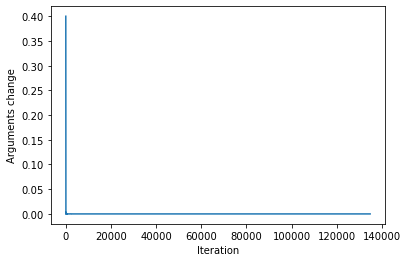

In [55]:
#3 a) plot of process of finding an extremum for SGD algorithm:
def plotf(seq_x, seq_y):
    iteration = np.arange(1, len(seq_x))
    arg_diff = []
    for i in range(1, len(seq_x)):
        arg_diff = np.append(arg_diff, abs(seq_x[i] - seq_x[i-1] + seq_y[i] - seq_y[i-1]))
    plt.plot(iteration, arg_diff)
    plt.xlabel("Iteration")
    plt.ylabel("Arguments change")
    plt.show()
    
plotf(SGD_output[2], SGD_output[3])

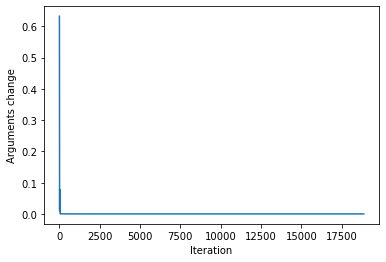

In [72]:
#3 b) plot of process of finding an extremum for Adam algorithm:

plotf(Adam_output[2], Adam_output[3])

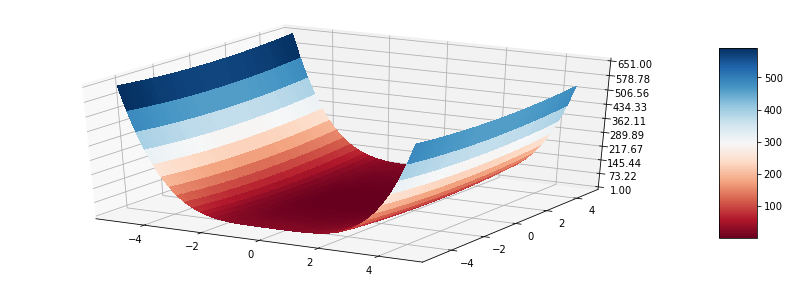

In [57]:
#plot objective function
x = np.arange(-5, 5, 0.25)
y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)

fig = plt.figure(1, figsize = (15, 5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink = 0.7, aspect=5)
plt.show()

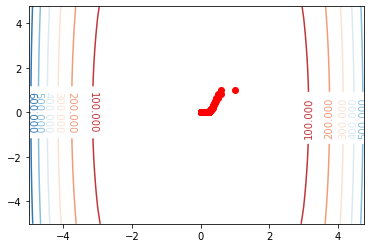

In [58]:
#plot output results SGD
def contour_plot(x_seq, y_seq):
    plt.figure(1)
    CS = plt.contour(X, Y, Z, cmap=cm.RdBu)
    plt.clabel(CS, inline=1, fontsize=10)
    
    plt.plot(x_seq, y_seq, 'ro')
    plt.show()
    
contour_plot(SGD_output[2],SGD_output[3])

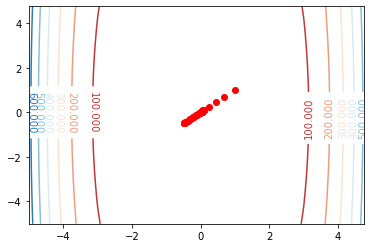

In [79]:
contour_plot(Adam_output[2],Adam_output[3])